👨‍🎓 Integrantes:

Alice C. M. Assis - RM 566233

Leonardo S. Souza - RM 563928

Lucas B. Francelino - RM 561409

Pedro L. T. Silva - RM 561644

Vitor A. Bezerra - RM 563001

GitHub: 

🌱📊 Visão Geral do Dataset

O dataset é uma coleção de informações sobre a saúde das plantas, derivadas de biossensores simulados. Ele registra diversos parâmetros ambientais, do solo e relações da planta, para a avaliação da saúde vegetal

In [278]:
!pip install pandas numpy matplotlib plotly joblib seaborn scikit-learn xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [279]:
# 🔍 Importação de bibliotecas especializadas para análise de dados agrícolas

# ------------------------------
# 📊 Manipulação e Visualização
# ------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import os

# ------------------------------
# 🤖 Modelagem (Classificadores)
# ------------------------------

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report, accuracy_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")


🎯 Objetivo

Desenvolver um modelo de aprendizagem de maquina capaz de prever o estado de saúde da planta. Envolvendo:

    📈 Exploração e processamento dos dados:
        • Trazer para nossa realidade e entender a correlação dos dados para extrair informações valiosas.

    🛠️ Desenvolvimento e validação do modelo:
        • Treinar e validar multiplos modelos para determinar o melhor a ser usado de acordo com metrica de performace.
    

In [280]:
# 🗺️ Exploração e carregar o conjunto de dados

# Carregar o conjunto de dados de um arquivo CSV
# Certifique-se de que o arquivo 'plant_health_dataset.csv' está no mesmo diretório do script
# ou forneça o caminho correto para o arquivo.
dado = pd.read_csv('plant_health_data.csv')

# 🗂️ Criar uma cópia do DataSet para evitar alterações no original
df = dado.copy()
print("Conjunto de dados carregado com sucesso!")

# 📝 Exibir as primeiras linhas do DataSet para inspeção
print("Formato do DataSet:",df.shape)
display(df.head())

# 🗒️ Exibir informações gerais do DataSet
print("\nInformações do DataSet:")
print(df.info()) 

# 🧮 Exibir estatísticas descritivas do DataSet
print("\nEstatísticas descritivas do DataSet:")
display(df.describe())




Conjunto de dados carregado com sucesso!
Formato do DataSet: (1200, 14)


,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress



Informações do DataSet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11),

,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,5.500000,25.106918,23.999130,19.957794,54.853165,612.637265,6.524102,30.106751,30.264484,30.112088,34.749591,0.987764
std,2.873479,8.677725,3.441561,2.932073,8.784916,228.318853,0.581755,11.514396,11.466846,11.668085,8.766995,0.575116
min,1.000000,10.000724,18.001993,15.003710,40.028758,200.615482,5.507392,10.003650,10.017690,10.000606,20.025511,0.002376
25%,3.000000,17.131893,21.101766,17.353027,47.019694,416.878983,6.026042,20.249774,20.894445,19.585561,27.463350,0.487982
50%,5.500000,25.168333,23.889044,19.911473,54.692069,617.240221,6.540524,30.138590,30.019385,30.495054,34.433427,0.981647
75%,8.000000,32.370231,27.042634,22.596851,62.451053,811.474690,7.030039,40.184737,40.131459,40.108296,42.232637,1.473142
max,10.000000,39.993164,29.990886,24.995929,69.968871,999.856262,7.497823,49.951136,49.980700,49.981945,49.990811,1.996116


In [281]:
# ❌ Remoção de colunas desnecessárias para nosso projeto, cada uma das colunas eliminadas é para ajustar nosso ambiente de trabalho, não à possibilidade de capturar informações com sensores de pH do solo, teor de clorofila, sinal eletroquímico, níveis de nitrogênio, fósforo e potássio.
df = df.drop(columns=['Soil_pH', 'Soil_pH', 'Chlorophyll_Content', 'Electrochemical_Signal','Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Soil_Temperature'])  

df.head()

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Humidity,Light_Intensity,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,55.291904,556.172805,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,63.949181,596.136721,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,67.837956,591.124627,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,58.190811,241.412476,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,63.772036,444.493830,High Stress


In [282]:
# 🔍 Analise pós remoção de colunas

# 📝 Exibir as primeiras linhas do DataSet para inspeção
print("Formato do DataSet:",df.shape)
display(df.head())

# 🗒️ Exibir informações gerais do DataSet
print("\nInformações do DataSet:")
print(df.info()) 

# 🧮 Exibir estatísticas descritivas do DataSet
print("\nEstatísticas descritivas do DataSet:")
display(df.describe())

# 🚫 Verificar valores ausentes e duplicados
print(f'\nValores Ausentes no DataSet: {df.isna().sum().sum()}')
print(f'Valores Duplicados no DataSet: {df.duplicated().sum()}')

# 📊 Análise de valores únicos em cada coluna
print("\nValores unicos em cada coluna:")
print(df.nunique())




Formato do DataSet: (1200, 7)


,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Humidity,Light_Intensity,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,55.291904,556.172805,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,63.949181,596.136721,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,67.837956,591.124627,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,58.190811,241.412476,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,63.772036,444.493830,High Stress



Informações do DataSet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            1200 non-null   object 
 1   Plant_ID             1200 non-null   int64  
 2   Soil_Moisture        1200 non-null   float64
 3   Ambient_Temperature  1200 non-null   float64
 4   Humidity             1200 non-null   float64
 5   Light_Intensity      1200 non-null   float64
 6   Plant_Health_Status  1200 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 65.8+ KB
None

Estatísticas descritivas do DataSet:


,Plant_ID,Soil_Moisture,Ambient_Temperature,Humidity,Light_Intensity
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,5.500000,25.106918,23.999130,54.853165,612.637265
std,2.873479,8.677725,3.441561,8.784916,228.318853
min,1.000000,10.000724,18.001993,40.028758,200.615482
25%,3.000000,17.131893,21.101766,47.019694,416.878983
50%,5.500000,25.168333,23.889044,54.692069,617.240221
75%,8.000000,32.370231,27.042634,62.451053,811.474690
max,10.000000,39.993164,29.990886,69.968871,999.856262



Valores Ausentes no DataSet: 0
Valores Duplicados no DataSet: 0

Valores unicos em cada coluna:
Timestamp              1200
Plant_ID                 10
Soil_Moisture          1200
Ambient_Temperature    1200
Humidity               1200
Light_Intensity        1200
Plant_Health_Status       3
dtype: int64


🗂️ Informações Coletadas

Tamanho do Dataset:
        1200 linhas e 7 colunas.
        
Visão geral:

        • Plant_ID: Identificador para cada planta no dataset
        • Soil_moisture (%): Humidade do solo
        • Ambient_Temperature (°C): Temperatura do ambiente
        • Humidity (%): Humidade do Ar
        • Plant_Health_Status: Dividi categoricamente o estatus da planta em 3 classes:
                • Healthy: Planta saudavel
                • Moderate Stress: Estresse moderado
                • High Stress: Estresse alto
                
Informações do DataSet:

        • Não existe valores nulos
        Tipos de Dados:
                • 5 Colunas numéricas (Plant_ID, Soil_Moisture, Ambient_Temperature,Humidity)                            
                • 2 Colunas Categoricas (Timestamp, Plant_Health_Status)
        • Nao existe valores ausentes e duplicados

Valores unicos em cada coluna:

        • Timestamp: 1200 valores unicos
        • Plant_ID: 10 valores unicos
        • Plant_Health_Status: 3 valores unicos
        • Todas colunas numericas: 1200 valores unicos em cada coluna numerica

Estatisticas:

        • Soil_Moisture: 
                • MIN: 10%
                • MAX: 39%
                • MÉDIA: 25%

        • Ambient_Temperature:
                • MIN: 18 °C
                • MAX: 24 °C
                • MÉDIA: 30 °C
                
        • Humidity:
                • MIN: 40 %
                • MAX: 54 %
                • MÉDIA: 69.9 %

🗂️ Definição das colunas utilizadas para cada tipo de gráfico, facilitando a reutilização e tornando o código mais limpo e compreensível.

In [283]:
numerical_columns = ['Plant_ID', 'Soil_Moisture', 'Ambient_Temperature', 'Humidity', 'Light_Intensity']

category_columns = df.select_dtypes(include=['object']).columns.tolist()

column_target = 'Plant_Health_Status'

# ================================
# GRÁFICO DE Pizza
# ================================
pizza_figsize = (12, 6)
pizza_color = sns.color_palette('colorblind')
pizza_startangle = 180
pizza_autopct = '%1.1f%%'
pizza_explode = [0.01]*df[column_target].nunique()

# ================================
# GRÁFICO DE CONTAGEM
# ================================
plt_countplot_figsize = (10, 6)
plt_countplot_palette = 'colorblind'
plt_countplot_title = f'Distibution Of {column_target}'
plt_countplot_xlabel = 'Plant Health Status'
plt_countplot_ylabel = 'Count'
plt_countplot_fontsize = 12


# ================================
# BOXPLOT INTERATIVO
# ================================
box_df =  ['Plant_ID', 'Soil_Moisture', 'Ambient_Temperature', 'Humidity'] # Remover colunas irrelevantes para o boxplot
boxplot_target = column_target
boxplot_numerical = box_df
boxplot_var_legend = 'variavel'
boxplot_value_legend = 'valor'
boxplot_title = 'Distribuição das Variáveis Numéricas por Status de Saúde da Planta'
boxplot_xaxis_title = "Plantas"
boxplot_yaxis_title = "Valor"
boxplot_boxmode = 'group'
boxplot_widht = 1200
boxplot_height = 600

# ================================
# BOXPLOT INTERATIVO luz
# ================================

boxplot_luz_numerical = ['Light_Intensity']
boxplot_luz_title = 'Distribuição da Variável Light_Intensity por Status de Saúde da Planta'

# ================================
# Facet Grid
# ================================
enviroments_conditions = ['Ambient_Temperature', 'Humidity', 'Light_Intensity']
facet_grid_height = 4
facet_grid_aspect = 1.2
facet_grid_sharey = True
facet_grid_sharex = True
facet_grid_kde = True
facet_grid_bins = 10
facet_grid_color = None

# ================================
# Facet Grid soil
# ================================

soil_properties = [
    'Soil_Moisture'
]

# ================================
# Correlation Heatmap
# ================================
plt_figure_fontsize = 16
plt_figure_xticks_rotation = 45
plt_figure_figsize = (13, 6)
plt_figure_cmap ='pink'
plt_figure_color ='navy'
plt_figure_annot = True

📉 Analise exploratoria dos Dados

A análise funciona como um chek-up inicial dos dados, garantindo que informações que usamos estejam claras e consistentes. Se pulássemos essa etapa, correríamos o risco de alimentar o modelo com dados confusos, redundantes ou até enganosos, o que comprometeria a previsão da saúde das plantas.

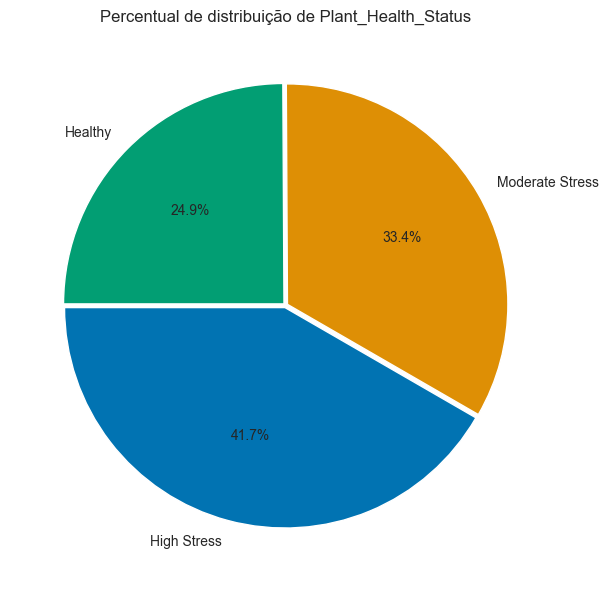

In [284]:
# ================================
# GRÁFICO DE Pizza
# ================================
  
plt.figure(figsize=pizza_figsize)

plt.subplot(1, 2, 2)

df[column_target].value_counts().plot.pie(
    autopct=pizza_autopct, 
    colors=pizza_color, 
    startangle=pizza_startangle, 
    explode=pizza_explode)

plt.title(f'Percentual de distribuição de {column_target}')

plt.ylabel('')  

plt.tight_layout()

plt.show()

🍕 Informações do grafico da Plant_Health_Status

    • Estresse alto é a maior categoria, indicando que a maior parte das plantas estavam em grande estresse
    

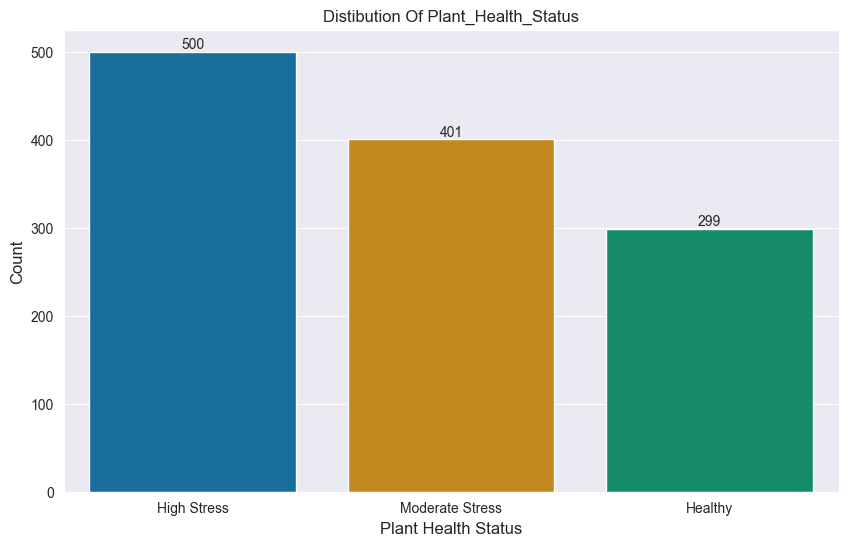

In [285]:
# ================================
# GRÁFICO DE CONTAGEM
# ================================

plt.figure(figsize=plt_countplot_figsize)

ct = sns.countplot(
    x=column_target, 
    data=df, 
    palette=plt_countplot_palette
    )

plt.title(
    plt_countplot_title, 
    fontsize=plt_countplot_fontsize
    )


plt.xlabel(
    plt_countplot_xlabel, 
    fontsize=plt_countplot_fontsize
    )

plt.ylabel(
    plt_countplot_ylabel,
    fontsize=plt_countplot_fontsize
    )

for container in ct.containers:
    ct.bar_label(container)

plt.show()





In [286]:
df_long = df.melt(id_vars=boxplot_target, 
                  value_vars=boxplot_numerical,
                  var_name=boxplot_var_legend, 
                  value_name=boxplot_value_legend)


fig = px.box(df_long, 
             x=boxplot_target, 
             y=boxplot_value_legend, color=boxplot_var_legend, points='all', title=boxplot_title)

fig.update_layout(
    xaxis_title=boxplot_xaxis_title,
    yaxis_title=boxplot_yaxis_title,
    boxmode=boxplot_boxmode,  
    xaxis_tickangle=-45,
    legend_title=boxplot_var_legend,
    height=boxplot_height,
    width=boxplot_widht
)

📉 Analise exploratoria dos Dados

- Plant_ID:

    • Distribuição equilibrada entre todos os IDs.

    • Não há valores discrepantes, o que faz sentido já que se trata apenas de um código de identificação.

- Soil_Moisture:

    • Varia entre 10% e 40%.

    • Foram detectados valores extremos tanto abaixo quanto acima da faixa, possivelmente refletindo solos excessivamente secos ou saturados   de água.

    • Plantas Saudáveis: Mantêm níveis de umidade moderados no solo, indicando hidratação adequada.

    • Plantas em Alto Estresse: Apresentam uma faixa mais ampla de umidade, desde valores muito baixos até muito altos, o que pode estar associado a falta ou excesso de irrigação.

- Ambient_Temperature:

    • Temperatura ambiente: de 18°C a 30°C, concentrada em torno de 24°C.

    • Em todos os grupos, a temperatura do solo varia aproximadamente de 15°C a 25°C, mostrando que não há grandes discrepâncias entre os estados de saúde nesse aspecto

- Humidity:

    • Oscila de 40% a 70%, com média próxima de 55%.
    
    • A variação é pequena e há poucos valores fora do padrão, indicando controle adequado da umidade ambiental.
    


In [287]:
df_long = df.melt(id_vars=boxplot_target, 
                  value_vars=boxplot_luz_numerical,
                  var_name=boxplot_var_legend, 
                  value_name=boxplot_value_legend)


fig = px.box(df_long, 
             x=boxplot_target, 
             y=boxplot_value_legend, color=boxplot_var_legend, points='all', title=boxplot_luz_title)

fig.update_layout(
    xaxis_title=boxplot_xaxis_title,
    yaxis_title=boxplot_yaxis_title,
    boxmode=boxplot_boxmode,  
    xaxis_tickangle=-45,
    legend_title=boxplot_var_legend,
    height=boxplot_height,
    width=boxplot_widht
)

📉 Analise exploratoria dos Dados

- Light_Intensity:

    • Intervalo entre 200 e 1000 Lux.

    • Plantas saudáveis têm mediana um pouco mais alta (em torno de 650 Lux) em comparação com plantas de estresse moderado (cerca de 600 Lux).

    • Isso sugere que plantas saudáveis tendem a receber níveis um pouco maiores de luz.

    • Plantas em alto estresse apresentam mais casos em níveis baixos de iluminação, o que pode estar limitando a fotossíntese.

    • Apesar disso, como essa variabilidade, a luz não é o único fator determinante, mas provavelmente relevantes para a diferença no estado de saúde.

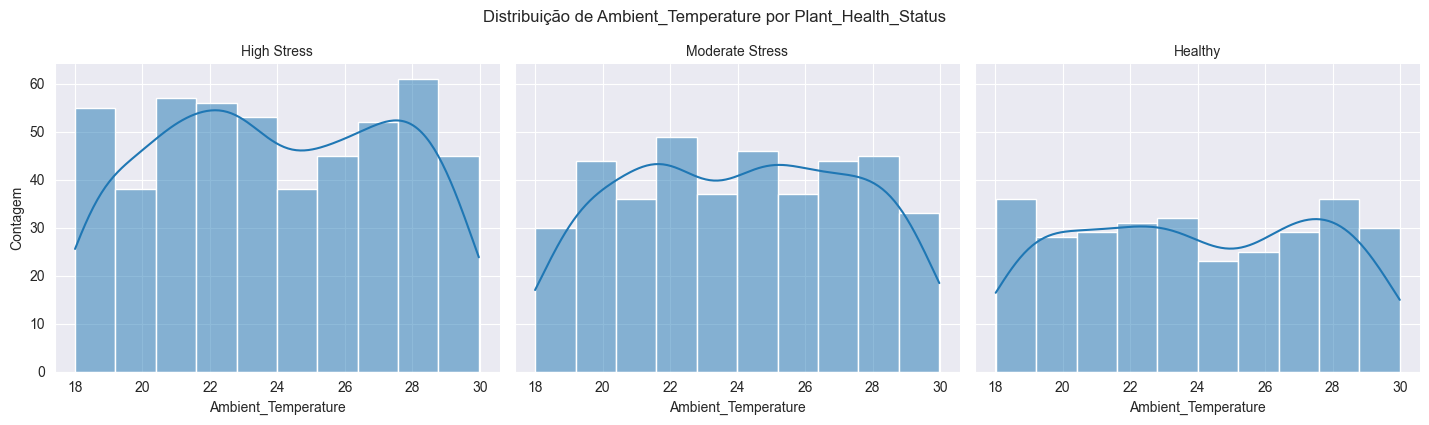

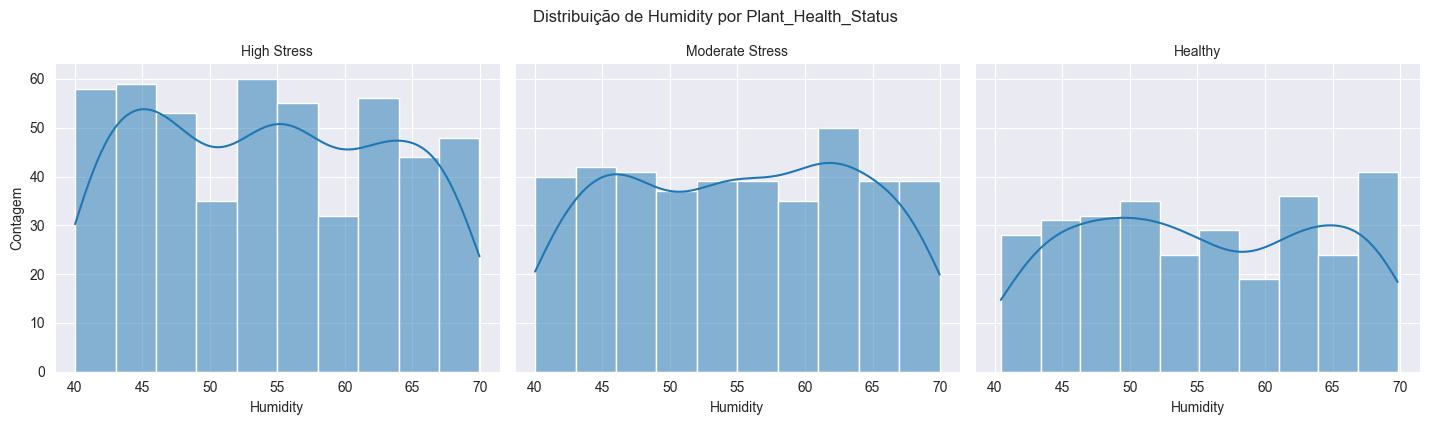

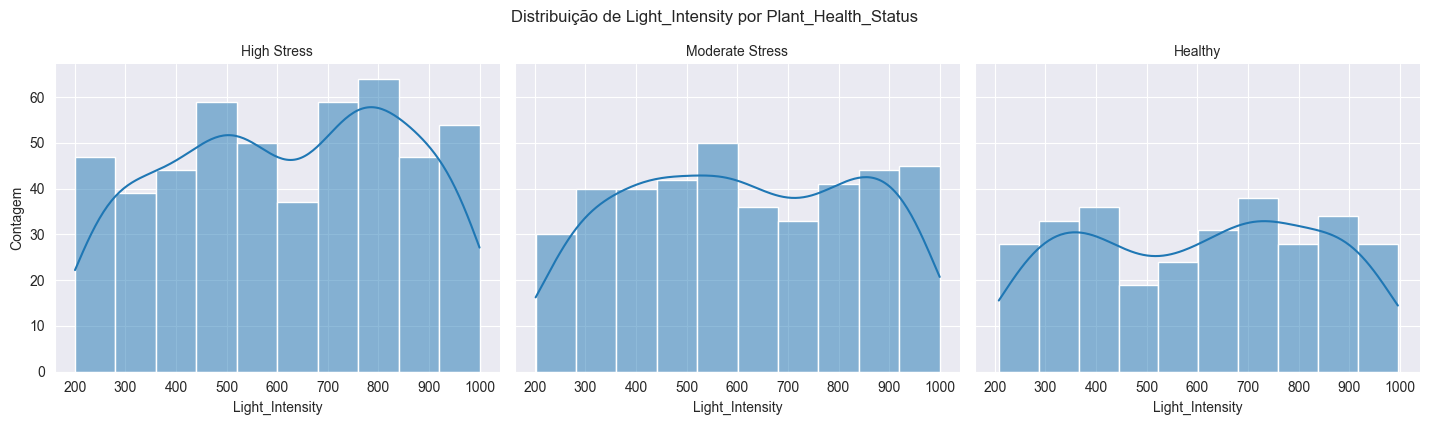

In [288]:


for condition in enviroments_conditions:
    facet_grid = sns.FacetGrid(
        df, 
        col=column_target,
        height=facet_grid_height, 
        aspect=facet_grid_aspect,
        sharex=facet_grid_sharex,
        sharey=facet_grid_sharey
        )
    facet_grid.map(
        sns.histplot, 
        condition, 
        kde=facet_grid_kde, 
        color=facet_grid_color, 
        bins=facet_grid_bins)
    facet_grid.set_axis_labels(condition, 'Contagem')
    facet_grid.set_titles(col_template="{col_name}")
    facet_grid.fig.suptitle(f'Distribuição de {condition} por {column_target}', y=1.05)
    plt.show()  

📉 Análise Exploratória dos Dados

🌡️ Temperatura Ambiente

  • Plantas Saudáveis:
    Valores concentrados em torno de 24°C, com pouca variação, sugerindo condições estáveis e ideais.

  • Plantas em Estresse Moderado:
    Distribuição um pouco mais ampla, variando entre 22°C e 26°C, o que indica uma certa tolerância a pequenas oscilações.

  • Plantas em Alto Estresse:
    Faixa bem mais larga, incluindo registros abaixo de 20°C e acima de 28°C, evidenciando situações extremas que favorecem o estresse.

💧 Umidade do Ar

  • Plantas Saudáveis:
    Média próxima de 55%, com variação restrita (cerca de 50–60%), representando condições ideais para transpiração.

  • Plantas em Estresse Moderado:
    Leve redução no pico central e maior dispersão (45–65%), sugerindo que a umidade começa a impactar o nível de estresse.

  • Plantas em Alto Estresse:
    Distribuição bastante ampla, com ocorrência de valores tanto abaixo de 45% quanto acima de 65%, indicando desvios marcantes em relação ao ideal.

☀️ Intensidade da Luz

  • Plantas Saudáveis:
    Apresentam intensidade luminosa geralmente mais elevada (600–800 Lux), favorecendo a fotossíntese.

  • Plantas em Estresse Moderado:
    Recebem níveis um pouco menores de luz, com alguns casos em faixas abaixo do ideal (<600 Lux).

  • Plantas em Alto Estresse:
    Grande variação, incluindo situações de baixa luminosidade (<400 Lux) e de excesso de luz (>900 Lux), condições que podem causar estresse relacionado à radiação.

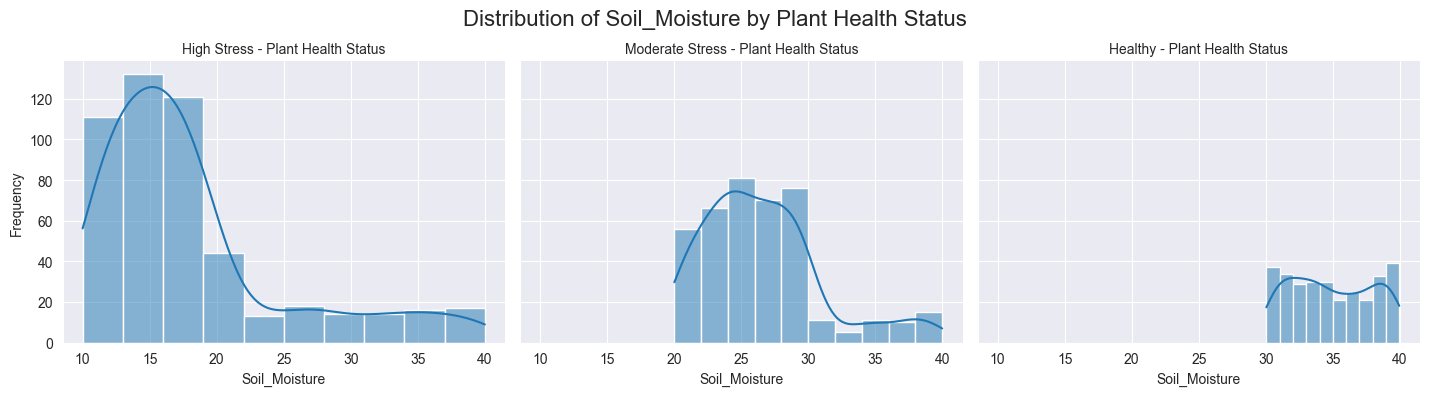

In [289]:


# Create FacetGrid plots for each soil property
for property in soil_properties:
    facet_grid_soil = sns.FacetGrid(
        df, 
        col=column_target, 
        height=facet_grid_height, 
        aspect=facet_grid_aspect, 
        sharex=facet_grid_sharex, 
        sharey=facet_grid_sharey
    )
    facet_grid_soil.map(
        sns.histplot, 
        property, 
        kde=facet_grid_kde, 
        bins=facet_grid_bins, 
        color=facet_grid_color)
    
    facet_grid_soil.set_axis_labels(property, 'Frequency')
    
    facet_grid_soil.set_titles("{col_name} - Plant Health Status")
    
    facet_grid_soil.fig.subplots_adjust(top=0.85)
    
    facet_grid_soil.fig.suptitle(
        f'Distribution of {property} by Plant Health Status', 
        fontsize=16, 
        y=0.98
    )
    plt.show()
    
    

📉 Análise Exploratória dos Dados

🌱 Umidade do Solo

  •  Plantas Saudáveis:
        A concentração maior ocorre em níveis mais altos de umidade (~30–35%), sugerindo que estão bem hidratadas.

  •  Plantas em Estresse Moderado:
        A distribuição desloca-se para valores mais baixos (~20–25%), refletindo uma redução na disponibilidade de água.

  •  Plantas em Alto Estresse:
        Predominam os níveis mais baixos de umidade (~15–20%), caracterizando estresse hídrico.

🌡️ Temperatura do Solo

  •  Plantas Saudáveis:
        Valores concentrados em torno de 22°C, faixa considerada ideal para a atividade das raízes.

  •  Plantas em Estresse Moderado:
        Padrão parecido ao das plantas saudáveis, mas com um pouco mais de variação.

  •  Plantas em Alto Estresse:
        Distribuição levemente deslocada para temperaturas abaixo de 20°C, com maior dispersão, o que pode indicar condições de estresse relacionadas à temperatura do solo.

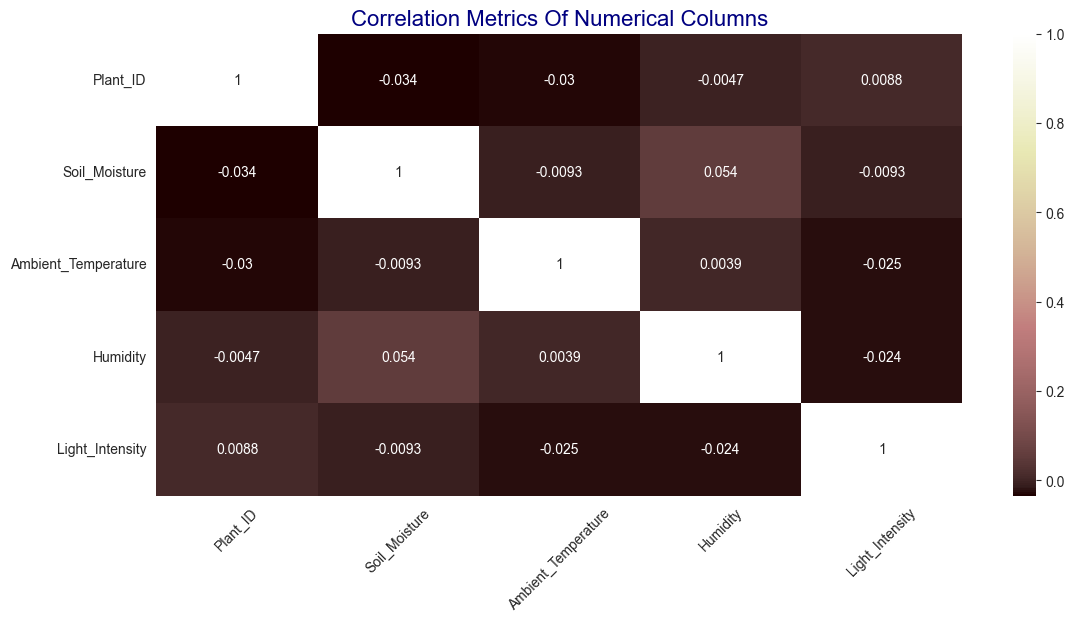

In [290]:
plt.figure(figsize=plt_figure_figsize)

sns.heatmap(df.corr(numeric_only=True), 
            annot=plt_figure_annot, 
            cmap=plt_figure_cmap)

plt.title(
    'Correlation Metrics Of Numerical Columns',
    fontsize=plt_figure_fontsize,
    color=plt_figure_color)

plt.xticks(rotation=plt_figure_xticks_rotation)

plt.show()



📉 Análise Exploratória dos Dados

    • A maioria das correlações é fraca, o que evidencia o caráter complexo e independente dessas variáveis.
   
    • As ligações entre propriedades do solo e indicadores de saúde das plantas são pouco expressivas, sugerindo que outros fatores externos  podem estar exercendo maior influência sobre a vitalidade vegetal.

In [291]:
z_scores = zscore(df[numerical_columns])
outliers_zscore = (np.abs(z_scores) > 3).sum(axis=0)
print("Outliers Detected with Z-scores:\n", outliers_zscore)

Outliers Detected with Z-scores:
 [0 0 0 0 0]


📉 Análise Exploratória dos Dados

   • Nenhum outlier foi detectado em nenhuma das variáveis numéricas do conjunto de dados.

   • Isso indica que os dados numéricos estão dentro da faixa esperada, sem valores extremos que ultrapassem o limite de Z-score de ±3.

 🖥️ TREINAMENTO DE APRENDIZADO DE MAQUINA

In [292]:
df['Healthy'] = df['Plant_Health_Status'] == 'Healthy'

print(df['Healthy'].value_counts())


Healthy
False    901
True     299
Name: count, dtype: int64


In [293]:
X = df.drop(columns=['Plant_ID','Timestamp','Plant_Health_Status', 'Healthy'])  # Atributos
y = df['Healthy'] # Variavel alvo

In [294]:
X.head()

,Soil_Moisture,Ambient_Temperature,Humidity,Light_Intensity
0,27.521109,22.240245,55.291904,556.172805
1,14.835566,21.706763,63.949181,596.136721
2,17.086362,21.180946,67.837956,591.124627
3,15.336156,22.593302,58.190811,241.412476
4,39.822216,28.929001,63.772036,444.493830


Divisão dos dados:
    X são os atributos que o aprendizado de maquina vai usar para adivinhar o resultado
    Y são os resultados, a variavel alvo

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [296]:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (960, 4)
X_test Shape: (240, 4)
y_train Shape: (960,)
y_test Shape: (240,)


In [297]:
scaler = StandardScaler()

In [298]:
from sklearn.pipeline import Pipeline

class_models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(random_state=42))
    ]),
    "Adaboost Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', AdaBoostClassifier(random_state=42))
    ]),
    "XGBoost Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', XGBClassifier(random_state=42))
    ]),
    "KNN Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier())
    ]),
    "Decision Tree": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', DecisionTreeClassifier(random_state=42))
    ]),
    "Random Forest": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', GradientBoostingClassifier(random_state=42))
    ])
}


print("Models initialized:", list(class_models.keys()))

Logistic Regression: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=42))])
Adaboost Classifier: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', AdaBoostClassifier(random_state=42))])
XGBoost Classifier: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                         


Model: Logistic Regression
Accuracy: 0.85
F1 Score: 0.72


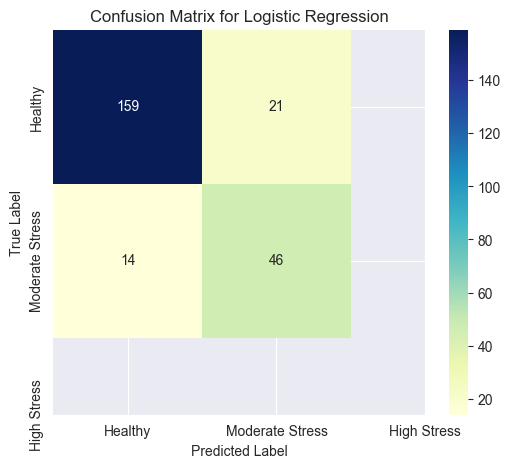


Model: Adaboost Classifier
Accuracy: 0.89
F1 Score: 0.82


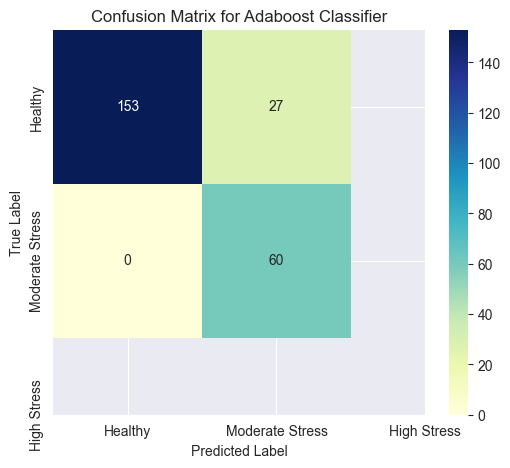


Model: XGBoost Classifier
Accuracy: 0.87
F1 Score: 0.76


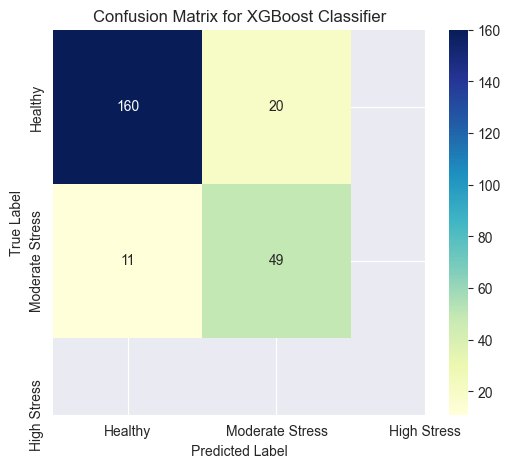


Model: KNN Classifier
Accuracy: 0.84
F1 Score: 0.70


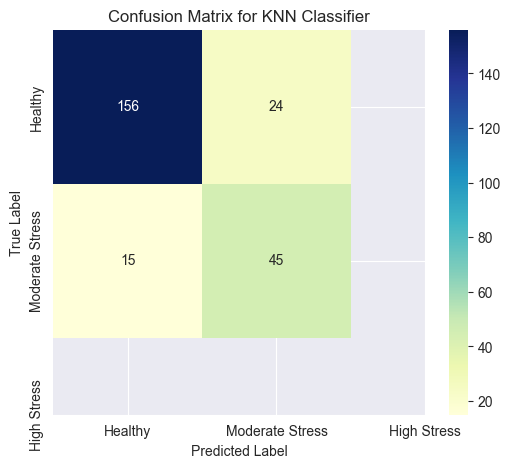


Model: Decision Tree
Accuracy: 0.85
F1 Score: 0.71


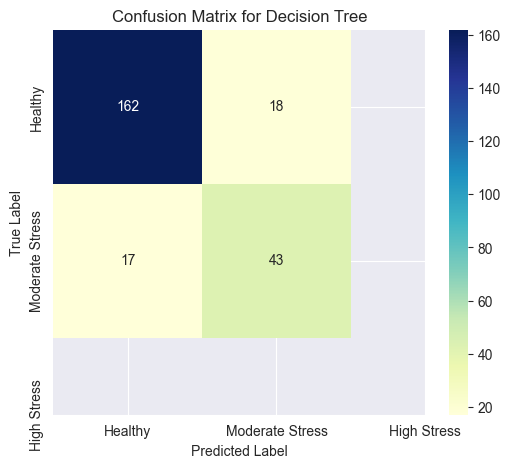


Model: Random Forest
Accuracy: 0.88
F1 Score: 0.79


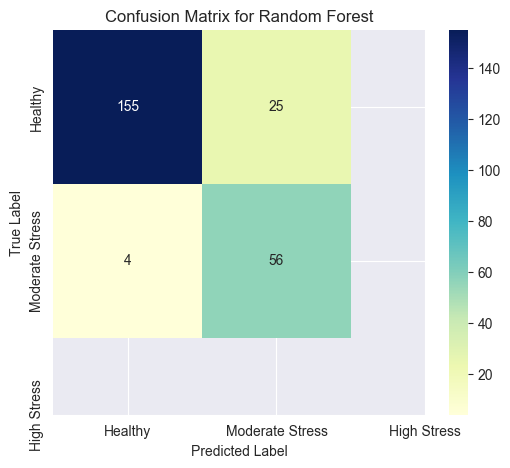


Model: Gradient Boosting
Accuracy: 0.90
F1 Score: 0.84


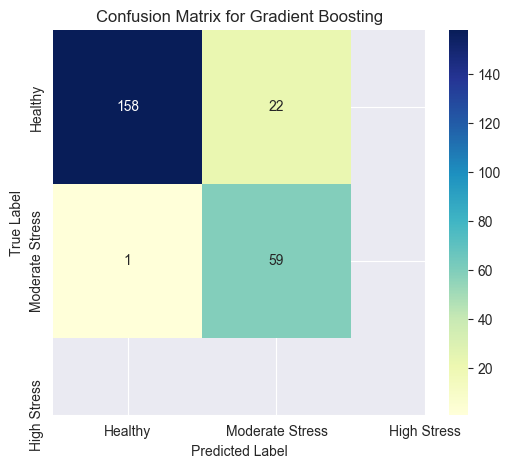


Melhor modelo: Gradient Boosting
Acurácia: 0.90
F1 Score: 0.84
Modelo salvo em: C:\Users\Lucas\PycharmProjects\fiap_fase5_cap1\src\ir_alem_2\src\Machine learning\Modelo\melhor_modelo.pkl


In [299]:
from sklearn.metrics import f1_score
# Initialize lists to store results
results = []

# Train and evaluate each model
for model_name, model in class_models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results.append({
        "model_name": model_name,
        "Model": model,
        "Accuracy": accuracy,
        "F1": f1,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
    })

# Display results for each model
for result in results:
    print(f"\nModel: {result['model_name']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"F1 Score: {result['F1']:.2f}")
    
    # Confusion Matrix Visualization
    cm = result["Confusion Matrix"]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Healthy', 'Moderate Stress', 'High Stress'], 
                yticklabels=['Healthy', 'Moderate Stress', 'High Stress'])
    plt.title(f'Confusion Matrix for {result["model_name"]}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()



# Encontrar o melhor modelo baseado na acurácia
best_result = max(results, key=lambda x: x['F1'])
print(f"\nMelhor modelo: {best_result['model_name']}")
print(f"Acurácia: {best_result['Accuracy']:.2f}")
print(f"F1 Score: {best_result['F1']:.2f}")


pasta_resultados = os.path.join(os.getcwd(), "Modelo")
os.makedirs(pasta_resultados, exist_ok=True)  # Cria a pasta se não existir

caminho_modelo = os.path.join(pasta_resultados, "melhor_modelo.pkl")
joblib.dump(best_result['Model'], caminho_modelo)
print(f"Modelo salvo em: {caminho_modelo}")
